### Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
%pip install tensorflow
%pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 71.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 69.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 37.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 69.4 MB/s et

In [3]:
import tensorflow as tf
import keras

2023-07-21 15:15:02.125326: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 15:15:02.199723: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 15:15:02.201461: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 15:15:03.526960: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
print("Tensorflow Version:",tf.__version__)
print("Keras Version:",keras.__version__)

Tensorflow Version: 2.13.0
Keras Version: 2.13.1


### Q2. Load the Wine Quality dataset and explore its dimensions.
### Dataset link:https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [5]:
import numpy as np
import pandas as pd

In [6]:
data=pd.read_csv('winequality.csv')

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
print("Dimenson of the data:",data.shape)

Dimenson of the data: (1599, 12)


### Q3. Check for null values, identify categorical variables, and encode them.

In [10]:
## cheking null values
data.isnull().sum().sum()

0

In [11]:
# identify categorical variables
cat_vars=data.select_dtypes(include='object').columns.tolist()

In [12]:
print("Categorical vriables:",cat_vars)

Categorical vriables: []


In this datasets neither present null values nor present categorical variables

### Q4. Separate the features and target variables from the dataset.

In [14]:
target_cols='quality'
x=data.drop(columns=target_cols,axis=1) # seprate the features from the dataset
y=data[target_cols] #seprate the target from the dataset
y=y.map({0:0,1:0,2:0,3:0,4:0,5:0,6:1,7:1,8:1,9:1,10:1})

### Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# split the datasets in to train and test
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
# split the dataset in to train and validation set
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

### Q6. Scale the dataset using an appropriate scaling technique.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()

In [20]:
X_train_scaled=scaler.fit_transform(X_train) # Scalled train data
X_val_scaled=scaler.transform(X_val) # Scaled validation data
X_test_scaled=scaler.transform(X_test) # Scaled test data

### Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [22]:
model=Sequential()

In [23]:
# creating Hidden layers
model.add(Dense(units=128,activation='relu',input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=64,activation='relu'))

In [24]:
model.add(Dense(units=1,activation='softmax')) # Output layers

### Q8. Create a Sequential model in Keras and add the previously designed layers to it.

In [25]:
model=Sequential()
model.add(Dense(units=128,activation='relu',input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=1,activation='softmax')) # Output layers

### Q9. Print the summary of the model architecture.

In [26]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1536      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Q12. Fit the model to the training data using appropriate batch size and number of epochs.

history=model.fit(X_train_scaled,y_train,batch_size=64,epochs=10,validation_data=(X_val_scaled,y_val))

### Q13. Obtain the model's parameters (weights and biases).

In [32]:
# Assuming 'model' is the trained neural network model
weights_and_biases = []

# Loop through each layer in the model to get the parameters
for layer in model.layers:
    layer_params = layer.get_weights()
    weights_and_biases.append(layer_params)

In [33]:
# Example usage for the first layer's weights and biases:
first_layer_weights = weights_and_biases[0][0]
first_layer_biases = weights_and_biases[0][1]

In [34]:
first_layer_weights

array([[ 0.07381731, -0.11096697, -0.17009443, ..., -0.10126486,
        -0.3769924 , -0.24460825],
       [-0.5349495 ,  0.32932594, -0.4929951 , ..., -0.12321015,
         0.33148944,  0.18060386],
       [-0.3280848 ,  0.02952938,  0.2735448 , ..., -0.00543105,
        -0.3431011 , -0.29862317],
       ...,
       [ 0.2320208 ,  0.03026398, -0.21825305, ...,  0.21616721,
        -0.05974267,  0.23845015],
       [ 0.09464689,  0.07953586, -0.18163437, ..., -0.33486736,
        -0.39718974,  0.05756524],
       [-0.18988086, -0.27898997, -0.20090015, ...,  0.3124753 ,
         0.25145608, -0.07585162]], dtype=float32)

In [35]:
first_layer_biases

array([ 1.05275400e-01, -8.15967694e-02, -2.26874482e-02, -1.34541066e-02,
        7.55404532e-02,  9.77329090e-02,  3.94610912e-02, -1.23227999e-01,
        5.95244206e-02,  8.78645405e-02, -9.52526275e-03,  1.15925685e-01,
        3.29151973e-02,  1.85506955e-01,  3.06764804e-02,  3.52753736e-02,
        4.34462391e-02,  4.13311608e-02, -6.04145564e-02,  8.70420933e-02,
        2.84267887e-02, -7.42796250e-03, -4.01790719e-04,  9.36945081e-02,
       -1.60175115e-01, -1.76475476e-02, -2.73424899e-03,  2.39005387e-01,
       -3.92417647e-02,  1.07750215e-01,  8.30059126e-02, -8.44508335e-02,
        9.27673429e-02,  7.23941550e-02,  3.57912760e-03,  2.51977183e-02,
        4.17494476e-02,  1.65652130e-02, -1.81866333e-01, -1.84418925e-04,
       -1.58611909e-02, -6.38467595e-02, -1.70792341e-02, -4.38521430e-02,
       -6.53249621e-02, -5.12220860e-02,  8.28511268e-02, -4.01792862e-02,
        3.53535563e-02, -3.30501869e-02, -1.54425437e-02,  1.30674258e-01,
        6.67412728e-02, -

### Q14. Store the model's training history as a Pandas DataFrame.

In [36]:
# Store the model's training history as a Pandas DataFrame
history_df = pd.DataFrame(history.history)

### Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

In [37]:
import matplotlib.pyplot as plt

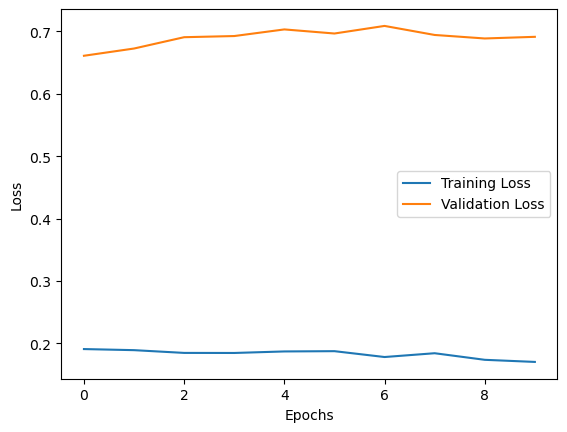

In [38]:
# Plot the training and validation loss over epochs
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

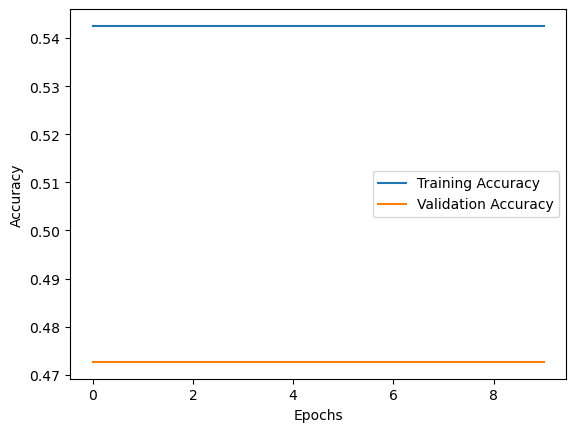

In [39]:
# Plot the training and validation accuracy over epochs
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [40]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

10/10 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.5594
Test Loss: 0.5813339948654175
Test Accuracy: 0.559374988079071
